## Binning, Discretization, Linear Models, and Trees

The best way to represent data depends not only on the semantics of the data, but also on the kind of model you are using. Linear models and tree-based models (such as decision trees, gradient boosted trees, and random forests), two large and very commonly used families, have very different properties when it comes to how they work with different feature representations. 

Let’s go back to the wave regression dataset that we used in Chapter 2. It has only a single input feature. Here is a comparison of a linear regression model and a decision tree regressor on this dataset:

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

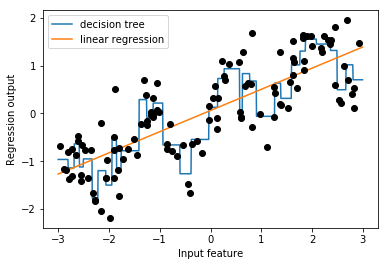

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you know, linear models can only model linear relationships, which are lines in the case of a single feature. The decision tree can build a much more complex model of the data. However, this is strongly dependent on the representation of the data. One way to make linear models more powerful on continuous data is to use *binning* (also known as *discretization*) of the feature to split it up into multiple features, as described here.

We imagine a partition of the input range for the feature (in this case, the numbers from –3 to 3) into a fixed number of bins—say, 10. A data point will then be represented by which bin it falls into. There are several ways to define the edges of the bins; for example, giving them uniform width (making the bin edges equidistant) or using quantiles of the data (i.e., having smaller bins where there’s more data). Both of these strategies are implemented in the *KBinsDiscretizer*:

In [3]:
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


Here, the first bin contains all data points with feature values from -2.967 (the smallest value in the data) to -2.378, the second bin contains all points with feature values from -2.378 to -1.789, and so on. KBinsDiscretizer can be applied to multiple features at the same time, and the bin_edges_ contain the edges per feature. This is why they are a list of length one in this case.